In [1]:
import sys
import copy
sys.path.insert(0, "../../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.optimizers.md_simulator1 import MDT_simulator
from classes.optimizers.random_struct_search import Line_searcher1
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
class MD_animator(Animator):
    def __init__(self, 
                 e_line,
                 default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
        self.e_line = e_line

    def animate(self, i, atom_col, position, energies):
        cm_pos = np.mean(position,axis=0)
        #print("hov")
        atom_col.set_atom_positions(position-cm_pos)
        plot_elems = self(atom_col)
        xs = np.linspace(0, i, i)
        self.e_line.set_data(xs, energies[:i])
        return plot_elems["atoms"] + [self.e_line]

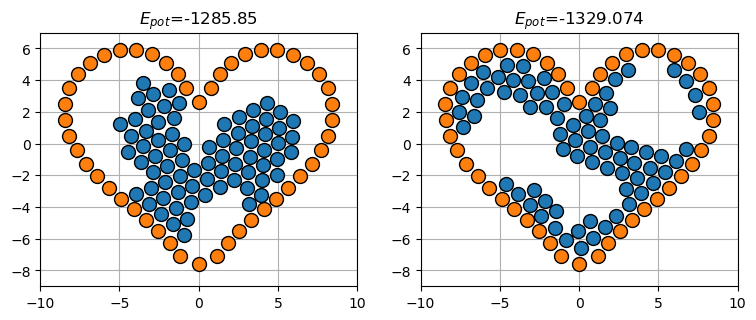

In [14]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

animator = MD_animator(markersize=10, e_line=None)
atom_writer = Atom_File_handler()
init_col = atom_writer.load_atom_collections("../relaxed_atom_col1")[-1]
final_col = atom_writer.load_atom_collections("saved_atom_cols/T0.25sim")[-1]


for ax, atom_col in zip(axs, [init_col, final_col]):
    ax.grid()
    ax.set_xlim([-10.0, 10.0])
    ax.set_ylim([-9.0, 7.0])
    atom_col.reset_plot_axes()
    s = animator(atom_col=atom_col, ax=ax)
    ax.set_title(r"$E_{pot}$="+f"{round(atom_col.get_potential_energy(),3)}")
    ax.set_aspect("equal")
plt.savefig("result.svg")